In [9]:
# Importing necessary modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

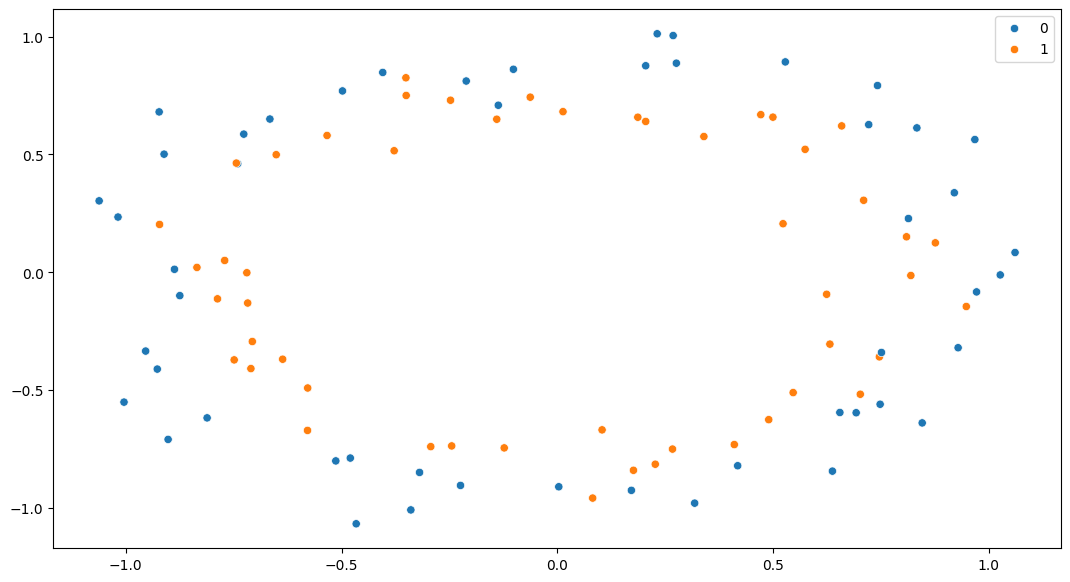

In [10]:
# Creating synthetic dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# Plotting the dataset
plt.figure(figsize=(13, 7))
sns.scatterplot(data = pd.DataFrame(X), x = X[:,0], y = X[:,1], hue=y)
plt.show()

In [11]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [12]:
# Building the model
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compiling and training - Without early stopping
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

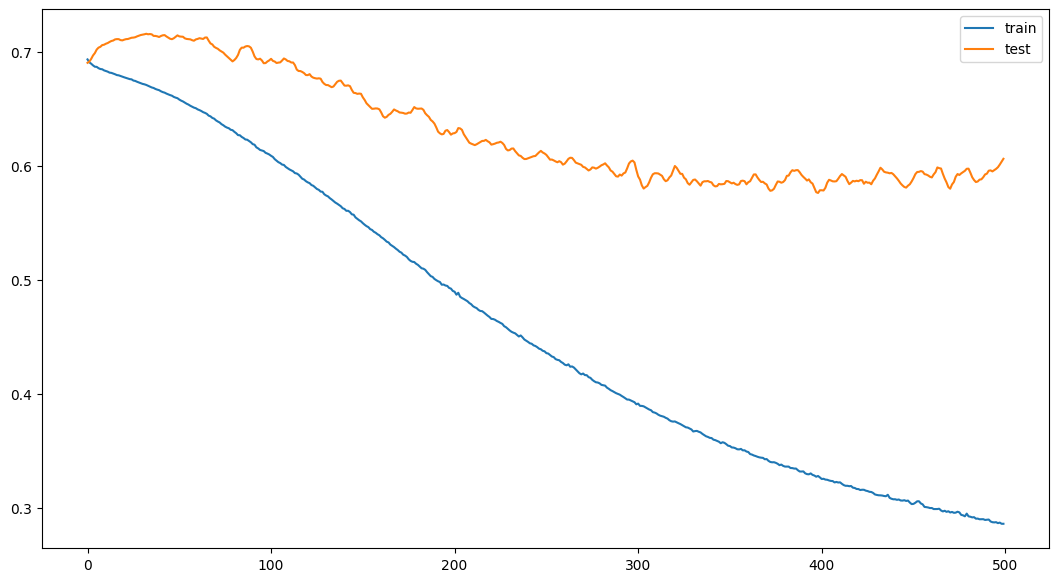

In [14]:
# Plotting the loss curve
plt.figure(figsize=(13, 7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

28438/28438 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step


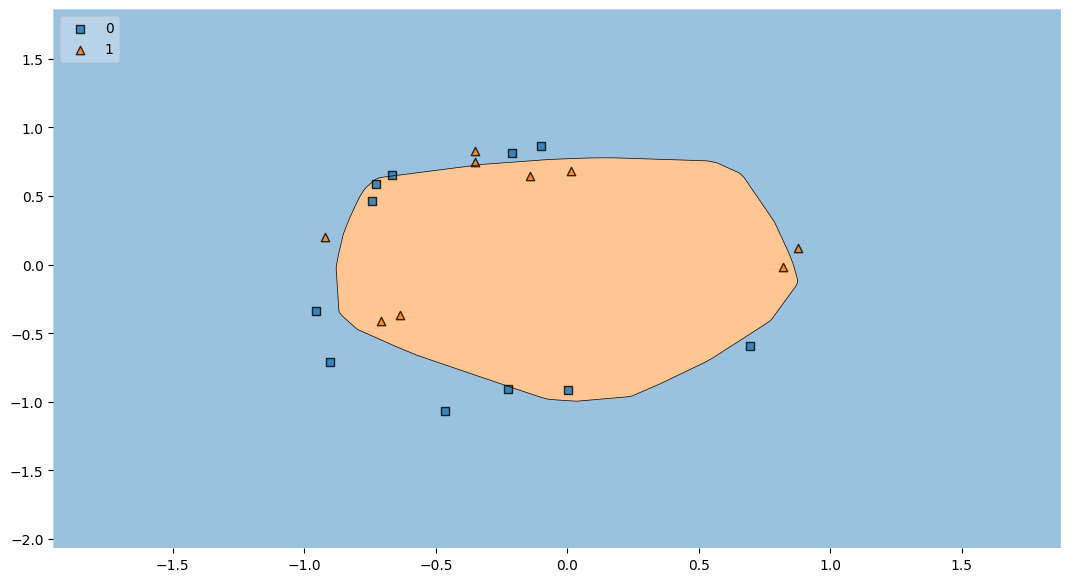

In [15]:
# Plotting the decision regions
plt.figure(figsize=(13, 7))
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [18]:
# Building the model
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Early stopping callback
callback = EarlyStopping(
    monitor="val_loss", # Matrix for monitering
    min_delta=0.00001, # If val_loss(monitor) is more than the specified value then there is an improvement
    patience=20, # No. of epochs after no improvements
    verbose=1,
    mode="auto", # 'max' - Stop increasing | 'min' - Stop decreasing monitored value | "auto" - autometic(recommended)
    baseline=None, # baseline number - only provide when you have value knowledge about your data
    restore_best_weights=False # The weights at which lowest loss value till early stopping
)

In [21]:
# Training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=callback)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.5250 - loss: 0.6942 - val_accuracy: 0.4000 - val_loss: 0.7000
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5250 - loss: 0.6920 - val_accuracy: 0.2500 - val_loss: 0.7027
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5250 - loss: 0.6908 - val_accuracy: 0.4000 - val_loss: 0.7036
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5125 - loss: 0.6896 - val_accuracy: 0.3500 - val_loss: 0.7048
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5500 - loss: 0.6881 - val_accuracy: 0.3500 - val_loss: 0.7064
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5500 - loss: 0.6872 - val_accuracy: 0.3500 - val_loss: 0.7076
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5250 - loss: 0.6865 - val_accuracy: 0.4000 - val_loss: 0.7094
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5250 - loss: 0.6859 - val_accuracy: 0.3500 - val_loss

Early Stopped in 21 epochs

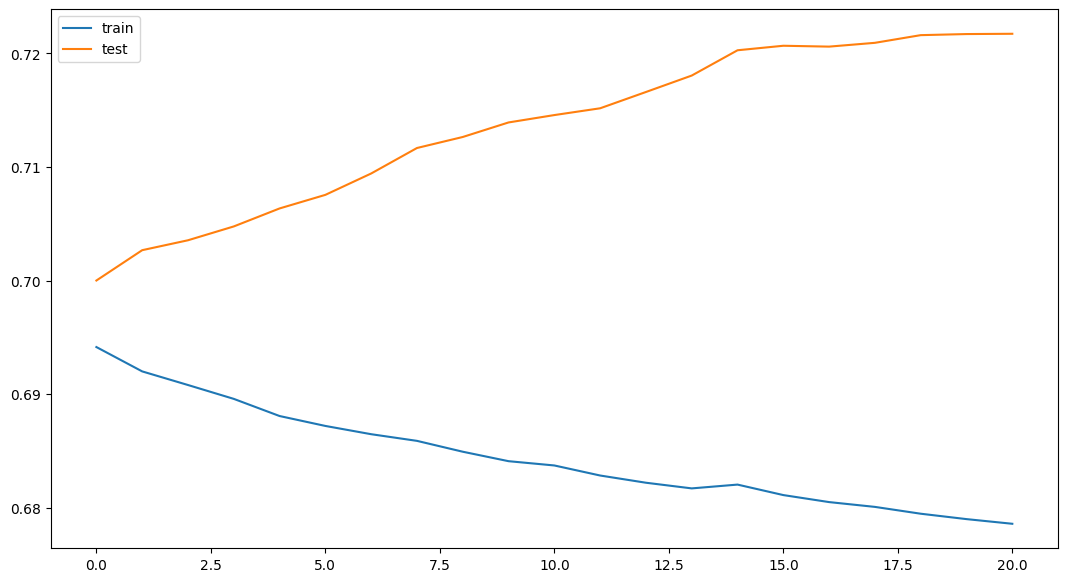

In [ ]:
# Plotting loss curve
plt.figure(figsize=(13, 7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

28438/28438 ━━━━━━━━━━━━━━━━━━━━ 26s 925us/step


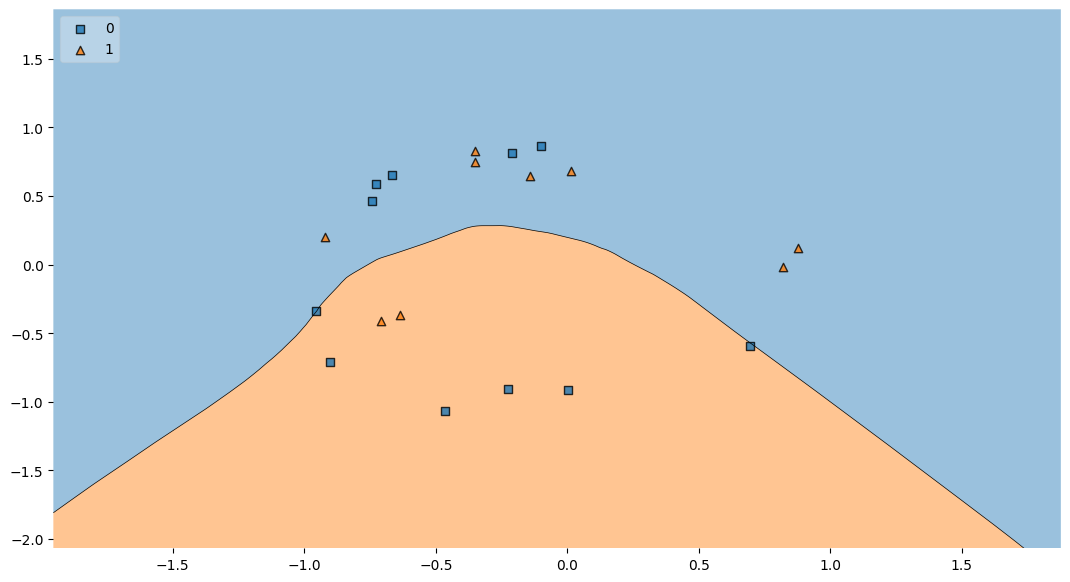

In [ ]:
# Plotting decision regions
plt.figure(figsize=(13, 7))
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()